# Ouverture fichiers

In [85]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [86]:
chemin_fichier_nc = 'era 5/wave 2021.nc'

ds = xr.open_dataset(chemin_fichier_nc)
wave_2021 = ds.to_dataframe()
wave_2021 = wave_2021.reset_index()
wave_20217 = wave_2021[(wave_2021['latitude'] == -17)&(wave_2021['longitude'] == -150)]
wave_2021 = wave_2021.rename(columns={'time': 'DateTime'})
wave_2021 = wave_2021.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
wave_2021 = wave_2021[['DateTime','mwp','shts','shww']]
wave_2021 = wave_2021.reset_index().drop(columns='index')

wave_era5_day_1 = wave_2021[['DateTime','mwp','shts','shww']]
wave_era5_day_1 = wave_era5_day_1.reset_index().drop(columns='index')
wave_era5_day_1

chemin_fichier_nc = 'era 5/wave2 era5.nc'
ds = xr.open_dataset(chemin_fichier_nc)
wave_2021 = ds.to_dataframe()
wave_2021 = wave_2021.reset_index()
wave_20217 = wave_2021[(wave_2021['latitude'] == -17)&(wave_2021['longitude'] == -150)]
wave_2021 = wave_2021.rename(columns={'time': 'DateTime'})
wave_2021 = wave_2021.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

wave_2021 = wave_2021[['DateTime','mpts','mpww','pp1d']]
wave_2021 = wave_2021.reset_index().drop(columns='index')

wave_era5_day_2 = wave_2021[['DateTime','mpts','mpww','pp1d']]
wave_era5_day_2 = wave_era5_day_2.reset_index().drop(columns='index')
wave_era5_day_1 = wave_era5_day_2.merge(wave_era5_day_1, on = 'DateTime')
wave_era5_day_1

,DateTime,mpts,mpww,pp1d,mwp,shts,shww
0,2021-01-01,8.198556,3.775013,7.057517,7.144367,1.300921,0.863975
1,2021-01-02,9.177140,4.079849,9.693340,7.617758,1.231828,1.069962
2,2021-01-03,9.986864,3.730621,14.864070,8.851169,1.613416,0.749165
3,2021-01-04,10.298925,4.341562,13.616653,8.670726,1.706971,1.095444
4,2021-01-05,9.365695,3.082002,13.437064,8.894800,1.799301,0.498016
...,...,...,...,...,...,...,...
207,2021-07-27,9.542682,2.188294,14.583098,9.368027,1.236525,0.171922
208,2021-07-28,10.142672,3.245922,13.652030,10.125609,1.315833,0.036014
209,2021-07-29,10.577663,3.496597,14.812295,10.569097,1.394823,0.018371
210,2021-07-30,10.342030,2.932788,12.615779,10.146516,1.562978,0.201659


In [87]:
chemin_fichier_nc = 'era 5/w1987.nc'

ds = xr.open_dataset(chemin_fichier_nc)

wave_era5 = ds.to_dataframe()
wave_era5 = wave_era5.reset_index()
wave_era5 = wave_era5[(wave_era5['latitude'] == -17)&(wave_era5['longitude'] == -150)]
wave_era5 = wave_era5.rename(columns={'time': 'DateTime'})
wave_era5_day = wave_era5.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
wave_era5_day = wave_era5_day[['DateTime', 'mwp','shww']]
wave_era5_day_1987_2023 = wave_era5_day.reset_index().drop(columns='index')
for i in range(1988,2024) :
    chemin_fichier_nc = 'era 5/w'+str(i)+'.nc'

    ds = xr.open_dataset(chemin_fichier_nc)

    wave_era5 = ds.to_dataframe()
    wave_era5 = wave_era5.reset_index()
    wave_era5 = wave_era5[(wave_era5['latitude'] == -17)&(wave_era5['longitude'] == -150)]
    wave_era5 = wave_era5.rename(columns={'time': 'DateTime'})
    wave_era5_day = wave_era5.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
    wave_era5_day = wave_era5_day[['DateTime', 'mwp','shww']]
    wave_era5_day = wave_era5_day.reset_index().drop(columns='index')
    wave_era5_day_1987_2023 = pd.concat([wave_era5_day_1987_2023, wave_era5_day], axis = 0)
wave_era5_day_1987_2023 = wave_era5_day_1987_2023[['DateTime', 'mwp','shww']]
wave_era5_day_1987_2023 = wave_era5_day_1987_2023.reset_index().drop(columns='index')
wave_era5_day_1987_2023 #contient la période et la hauteur des vagues entre 1987 et 2023 d'après era5

,DateTime,mwp,shww
0,1987-01-01,9.196943,0.771931
1,1987-01-02,9.094556,0.425425
2,1987-01-03,9.495846,0.262525
3,1987-01-04,9.421256,0.430196
4,1987-01-05,9.778707,0.152233
...,...,...,...
12897,2023-07-27,9.680084,0.048547
12898,2023-07-28,9.129578,0.097123
12899,2023-07-29,8.418108,0.757446
12900,2023-07-30,8.847960,1.054922


In [88]:
wave_houlographe = pd.read_csv('relevé houlographe/hauteur-significative-m.csv',sep= ';')
wave_houlographe['DateTime'] = wave_houlographe['DateTime'].astype('datetime64[ns]')


wave_houlographe['m'] = pd.to_numeric(wave_houlographe['m'].str.replace(',', '.'))
wave_houlographe = wave_houlographe.rename(columns={'m': 'Hauteur'})
wave_houlographe['DateTime'] = wave_houlographe['DateTime'].dt.date
wave_houlographe['DateTime'] = wave_houlographe['DateTime'].astype('datetime64[ns]') #données sur la hauteur recup sur le site du criobe

In [89]:
nouv_houle = pd.read_csv('relevé houlographe/SondeSBE26Tiahura_ViewProcessedWaves.csv',sep= ';')
nouv_houle['DateTime'] = nouv_houle['Date'].astype('datetime64[ns]')
nouv_houle['Significant height (cm)'] = nouv_houle['Significant height (cm)']*(10**(-2))
nouv_houle = nouv_houle.rename(columns={'Significant height (cm)': 'Hauteur'})
nouv_houle = nouv_houle.rename(columns={'Significant period (sec)': 'Période'})
nouv_houle=nouv_houle[['DateTime','Hauteur','Période']]
nouv_houle['DateTime']=nouv_houle['DateTime'].dt.date.astype('datetime64[ns]')
nouv_houle = nouv_houle.groupby('DateTime').agg('mean').reset_index()
nouv_houle #données de Gilles mais attention pb entre 2010 et 2013

,DateTime,Hauteur,Période
0,2009-01-02,0.820000,12.400000
1,2009-01-03,1.006667,13.541667
2,2009-01-04,0.956667,14.875000
3,2009-01-05,0.900833,14.125000
4,2009-01-06,0.616250,12.250000
...,...,...,...
1525,2016-03-06,1.212917,14.875000
1526,2016-03-07,1.255417,14.500000
1527,2016-03-08,0.992500,14.000000
1528,2016-03-09,1.014167,13.625000


Text(0, 0.5, 'Hauteur [m]')

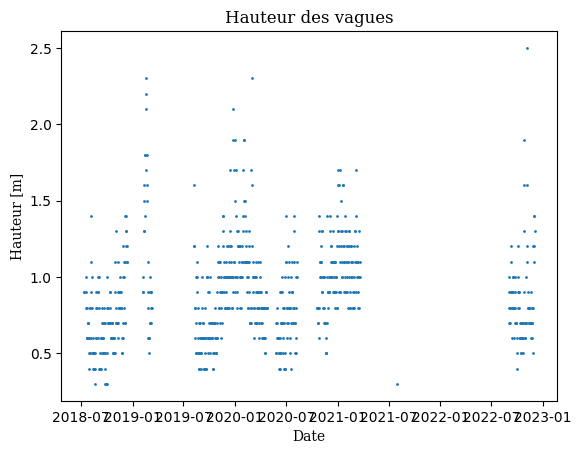

In [90]:
plt.scatter(wave_houlographe['DateTime'], wave_houlographe['Hauteur'], s = 1)
plt.xlabel('Date', fontfamily = 'serif')
plt.title('Hauteur des vagues',fontfamily = 'serif')
plt.ylabel('Hauteur [m]', fontfamily = 'serif')

In [91]:
period_houlographe = pd.read_csv('relevé houlographe/pic-de-priode-s-tiahura.csv',sep= ';')
period_houlographe['DateTime'] = period_houlographe['DateTime'].astype('datetime64[ns]')


period_houlographe['s'] = pd.to_numeric(period_houlographe['s'].str.replace(',', '.'))
period_houlographe = period_houlographe.rename(columns={'s': 'Période'})
period_houlographe['DateTime'] = period_houlographe['DateTime'].dt.date
period_houlographe['DateTime'] = period_houlographe['DateTime'].astype('datetime64[ns]') #données sur la période recup sur le criobe

Text(0, 0.5, 'Période [s]')

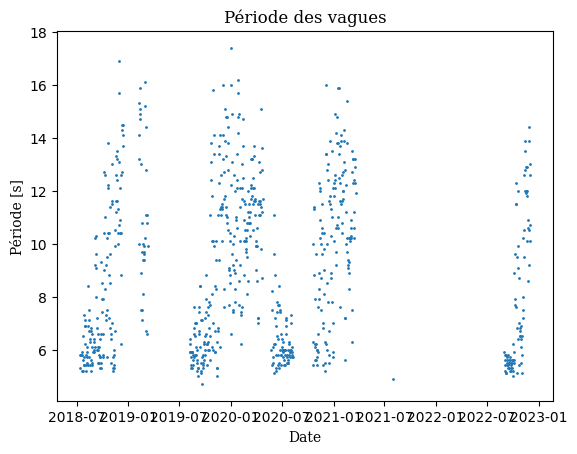

In [92]:
plt.scatter(period_houlographe['DateTime'], period_houlographe['Période'], s = 1)
plt.xlabel('Date', fontfamily = 'serif')
plt.title('Période des vagues',fontfamily = 'serif')
plt.ylabel('Période [s]', fontfamily = 'serif')

# Construction de la table

## Comparaison données in situ & era5 hauteur des vagues

In [93]:
wave_houlographe_2021 = wave_houlographe[(wave_houlographe['DateTime'] >= pd.to_datetime('2021-01-01'))&(wave_houlographe['DateTime'] <= pd.to_datetime('2021-03-20'))]
wave_era5_nouv = wave_era5_day_1987_2023[(wave_era5_day_1987_2023['DateTime'] >= pd.to_datetime('2009-01-02'))&(wave_era5_day_1987_2023['DateTime'] <= pd.to_datetime('2016-03-10'))]
wave_era5_day_1987_2023 = wave_era5_day_1[(wave_era5_day_1['DateTime'] >= pd.to_datetime('2021-01-01'))&(wave_era5_day_1['DateTime'] <= pd.to_datetime('2021-03-20'))]

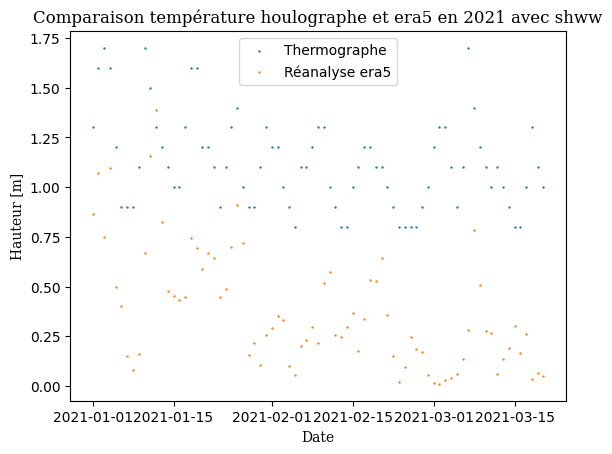

In [94]:
plt.scatter(wave_houlographe_2021['DateTime'], wave_houlographe_2021['Hauteur'], s = .5, label = 'Thermographe')
plt.scatter(wave_era5_day_1987_2023['DateTime'], wave_era5_day_1987_2023['shww'], s=.5, label='Réanalyse era5')
plt.title('Comparaison température houlographe et era5 en 2021 avec shww', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Hauteur [m]', fontfamily = 'serif')
plt.legend()

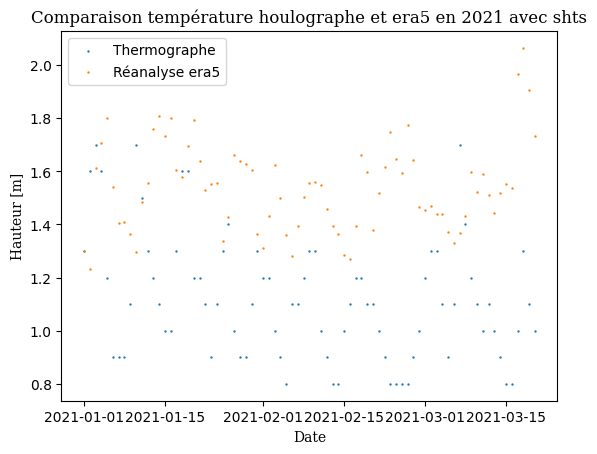

In [95]:
plt.scatter(wave_houlographe_2021['DateTime'], wave_houlographe_2021['Hauteur'], s = .5, label = 'Thermographe')
plt.scatter(wave_era5_day_1987_2023['DateTime'], wave_era5_day_1987_2023['shts'], s=.5, label='Réanalyse era5')
plt.title('Comparaison température houlographe et era5 en 2021 avec shts', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Hauteur [m]', fontfamily = 'serif')
plt.legend()

In [96]:
def cross_correlation(data, column1, column2, lag_max): 
    cross_correlation = []
    lags = []
    for lag in range(lag_max):
        cross_correlation.append(data[column1].shift(lag).corr(data[column2]))
        lags.append(lag)
    return np.array([cross_correlation, lags])

def find_lag(cross_cor):
    max_cross_cor = max(np.abs(cross_cor[0]))
    index = np.where(np.abs(cross_cor[0]) == max_cross_cor)
    return int(cross_cor[1][index][0])

def find_best_cross_correlation(cross_cor):
    max_cross_cor = max(np.abs(cross_cor[0]))
    index = np.where(np.abs(cross_cor[0]) == max_cross_cor)
    return cross_cor[0][index][0]

In [97]:
data_heigh = wave_houlographe_2021.merge(wave_era5_day_1987_2023, on = 'DateTime')
data_heigh_nouv = nouv_houle.merge(wave_era5_nouv, on = 'DateTime')
data_heigh['shww s']=data_heigh['shww'].shift(-1)
data_heigh_norm = data_heigh.copy()
for column in data_heigh_norm.columns:
    data_heigh_norm[column] = (data_heigh_norm[column] - data_heigh_norm[column].min()) / (data_heigh_norm[column].max() - data_heigh_norm[column].min())
matrix_corr = cross_correlation(data_heigh_norm,'Hauteur','shww',15)
find_lag(matrix_corr)

1

In [98]:
#data_heigh_nouv_f = [(data_period_nouv['DateTime'] >= pd.to_datetime('2014-01-01'))]

In [99]:
matrix_corr = cross_correlation(data_heigh_norm,'Hauteur','shts',15)
find_lag(matrix_corr)

10

In [100]:
def plot_with_best_lag(data, column1, column2, lag_max):
    cross_cor = cross_correlation(data, column1, column2, lag_max)
    best_lag = find_lag(cross_cor)
    plt.figure(figsize=(10, 5))
    plt.plot(data[column2].index, data[column1].shift(best_lag), label=column1)
    plt.plot(data[column2].index, data[column2], label=column2)
    plt.legend()
    plt.title('Best lag: ' + str((best_lag, data)) + ' with a cross-correlation of ' + str(np.round(max(cross_cor[0]), 2)))

def plot_with_and_without_lag(data, column1, column2, lag_max):
    cross_cor = cross_correlation(data, column1, column2, lag_max)
    best_lag = find_lag(cross_cor)
    plt.figure(figsize=(10, 5))
    plt.plot(data[column2].index, data[column2], label=column2)
    plt.plot(data[column2].index, data[column1].shift(best_lag), label=column1)
    plt.plot(data[column2].index, data[column1], label=column1 + ' without lag')
    plt.legend()
    plt.title('Best lag: ' + str((best_lag, data)) + ' with a cross-correlation of ' + str(np.round(max(cross_cor[0]), 2)))

    print(data_heigh['shww'].index, data_heigh['shww'])

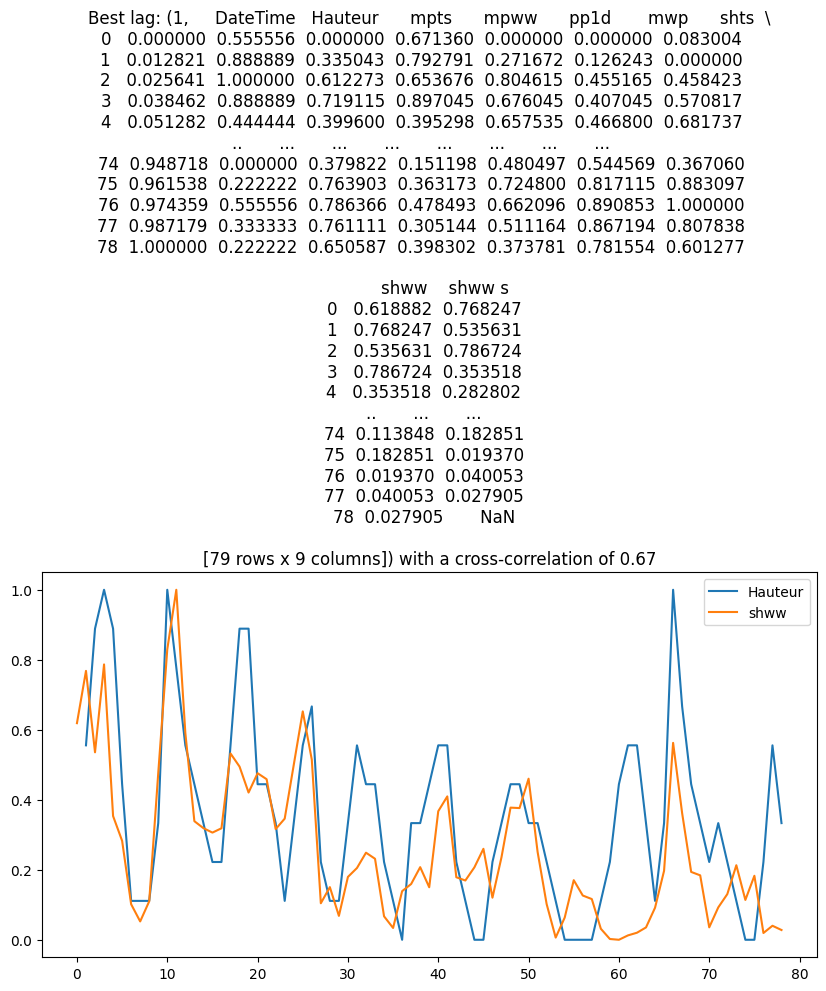

In [143]:
plot_with_best_lag(data_heigh_norm,'Hauteur','shww',15)
plt.savefig('output1 normalized')

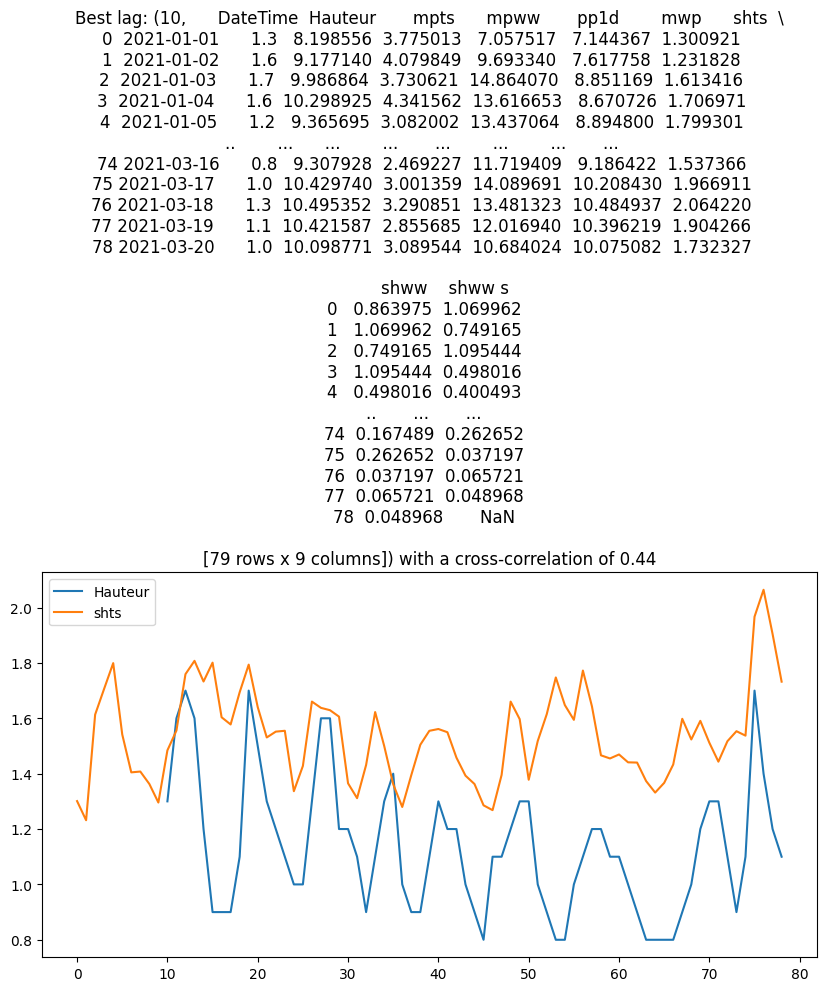

In [102]:
plot_with_best_lag(data_heigh,'Hauteur','shts',15)

In [103]:
print("corrélation without lag with shww :", (np.corrcoef(wave_houlographe_2021['Hauteur'],wave_era5_day_1987_2023['shww'])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(wave_houlographe_2021['Hauteur']), wave_era5_day_1987_2023['shww'])))

corrélation without lag with shww : 0.5819035444295272
rmse : 0.7844141066577265


In [104]:
print("corrélation  without lag with shts :", (np.corrcoef(wave_houlographe_2021['Hauteur'],wave_era5_day_1987_2023['shts'])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(wave_houlographe_2021['Hauteur']), wave_era5_day_1987_2023['shts'])))

corrélation  without lag with shts : -0.10920282010362393
rmse : 0.5157923533731603


In [105]:
print("corrélation  without lag with nouv :", (np.corrcoef(data_heigh['Hauteur'],data_heigh['shww'])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_heigh['Hauteur']), data_heigh['shww'])))

corrélation  without lag with nouv : 0.5819035444295272
rmse : 0.7844141066577265


In [106]:
print("corrélation with lag with shww :", (np.corrcoef(wave_houlographe_2021['Hauteur'].shift(1)[1:], wave_era5_day_1987_2023['shww'][1:])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(wave_houlographe_2021['Hauteur'].shift(1)[1:]), wave_era5_day_1987_2023['shww'][1:])))

corrélation with lag with shww : 0.6708688125957878
rmse : 0.7833709344684356


Text(0, 0.5, 'Hauteur era 5 [m]')

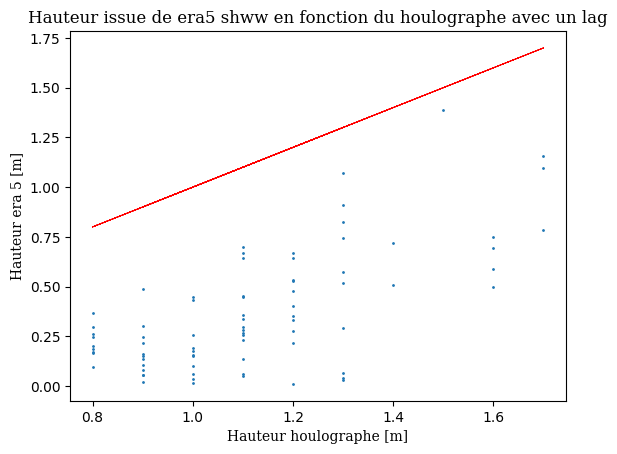

In [107]:
plt.scatter(wave_houlographe_2021['Hauteur'].shift(1)[1:], wave_era5_day_1987_2023['shww'].loc[:wave_houlographe_2021.shape[0]-1][1:], s = 1)
plt.plot(wave_houlographe_2021['Hauteur'].shift(1)[1:], wave_houlographe_2021['Hauteur'].shift(1)[1:], color = 'r', linestyle = '--', linewidth = .6)
plt.title('Hauteur issue de era5 shww en fonction du houlographe avec un lag', fontfamily = 'serif')
plt.xlabel('Hauteur houlographe [m]', fontfamily = 'serif')
plt.ylabel('Hauteur era 5 [m]', fontfamily = 'serif')

Text(0, 0.5, 'Hauteur era 5 [m]')

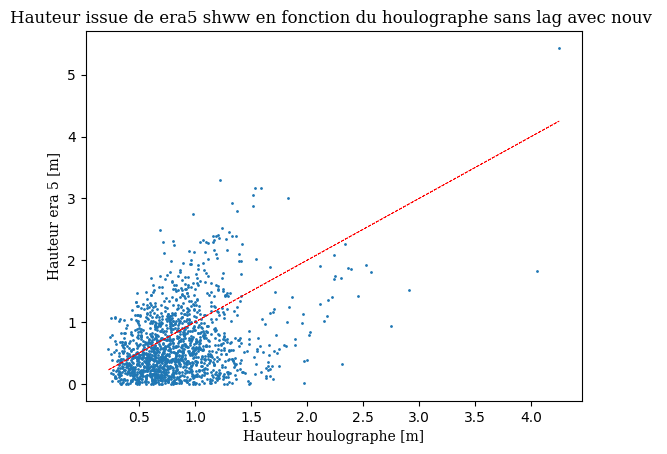

In [108]:
plt.scatter(data_heigh_nouv['Hauteur'], data_heigh_nouv['shww'], s = 1)
plt.plot(data_heigh_nouv['Hauteur'], data_heigh_nouv['Hauteur'], color = 'r', linestyle = '--', linewidth = .6)
plt.title('Hauteur issue de era5 shww en fonction du houlographe sans lag avec nouv ', fontfamily = 'serif')
plt.xlabel('Hauteur houlographe [m]', fontfamily = 'serif')
plt.ylabel('Hauteur era 5 [m]', fontfamily = 'serif')

Text(0, 0.5, 'Hauteur era 5 [m]')

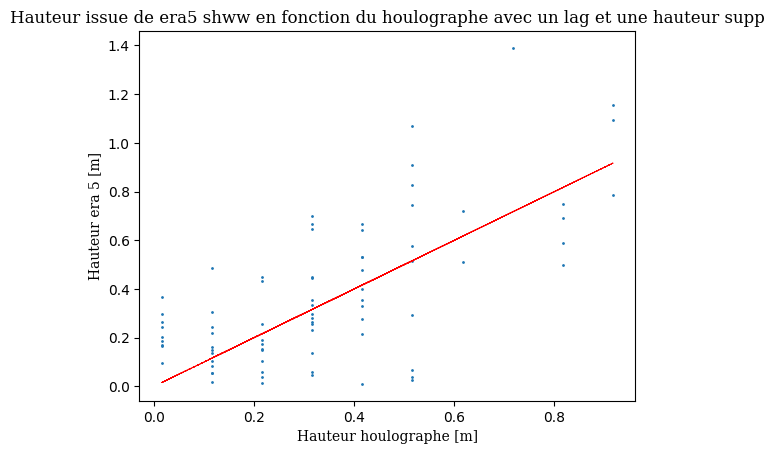

In [109]:
data_heigh['diff h']=data_heigh['Hauteur'].shift(1)-np.sqrt(metrics.mean_squared_error(np.array(wave_houlographe_2021['Hauteur'].shift(1)[1:]), wave_era5_day_1987_2023['shww'][1:]))
plt.scatter(data_heigh['diff h'][1:], data_heigh['shww'].loc[:data_heigh.shape[0]-1][1:], s = 1)
plt.plot(data_heigh['diff h'][1:], data_heigh['diff h'][1:], color = 'r', linestyle = '--', linewidth = .6)
plt.title('Hauteur issue de era5 shww en fonction du houlographe avec un lag et une hauteur supp', fontfamily = 'serif')
plt.xlabel('Hauteur houlographe [m]', fontfamily = 'serif')
plt.ylabel('Hauteur era 5 [m]', fontfamily = 'serif')

In [110]:
ratio = data_heigh['shww'][1:]/data_heigh['diff h'][1:]
dispersion = (data_heigh['shww'][1:]) - (data_heigh['diff h'][1:])

In [111]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
# Paramètres de la moyenne mobile
window_size = 17

x = np.array(ratio)
x_smoothed = moving_average(x.squeeze(), window_size)

y = np.array(dispersion)
y_smoothed = moving_average(y.squeeze(), window_size)

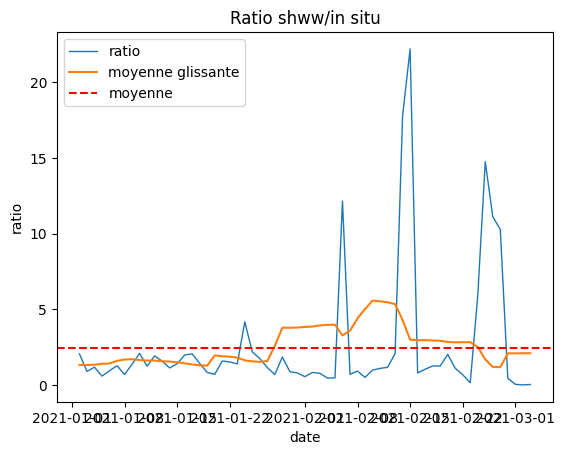

In [112]:
plt.plot(wave_era5_day_1987_2023['DateTime'][1:].loc[:ratio.shape[0] - window_size], ratio.loc[:ratio.shape[0] - window_size], linewidth = 1, label = 'ratio')
plt.plot(wave_era5_day_1987_2023['DateTime'].loc[:ratio.shape[0] - window_size][1:],x_smoothed[1:], label = 'moyenne glissante')
plt.axhline(y=ratio.mean(), color='r', linestyle='--', label = 'moyenne')
plt.title('Ratio shww/in situ')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()

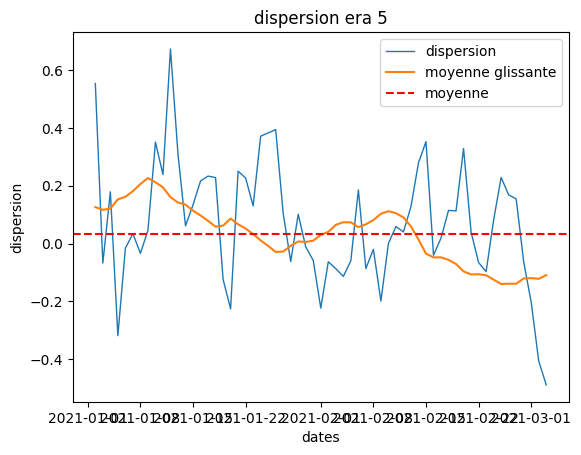

In [113]:
plt.plot(wave_era5_day_1987_2023['DateTime'][1:].loc[:dispersion.shape[0] - window_size], dispersion.loc[:dispersion.shape[0] - window_size], linewidth = 1, label = 'dispersion')
plt.plot(wave_era5_day_1987_2023['DateTime'][1:].loc[:dispersion.shape[0] - window_size], y_smoothed[1:], label = 'moyenne glissante')
plt.axhline(y=dispersion.mean(), color='r', linestyle='--', label = 'moyenne')
plt.title('dispersion era 5')
plt.xlabel('dates')
plt.ylabel('dispersion')
plt.legend()

## Comparaison données in situ & era5 période des vagues

In [114]:
wave_era5_day_1987_2023 = wave_era5_day_1[(wave_era5_day_1['DateTime'] >= pd.to_datetime('2021-01-01'))&(wave_era5_day_1['DateTime'] <= pd.to_datetime('2021-03-20'))]
period_houlographe_2021 = period_houlographe[(period_houlographe['DateTime'] >= pd.to_datetime('2021-01-01'))&(period_houlographe['DateTime'] <= pd.to_datetime('2021-03-20'))]
wave_era5_nouv

,DateTime,mwp,shww
8037,2009-01-02,8.599185,0.493453
8038,2009-01-03,8.954807,0.501052
8039,2009-01-04,9.645660,0.462802
8040,2009-01-05,9.956015,0.133399
8041,2009-01-06,9.744813,0.016853
...,...,...,...
10657,2016-03-06,12.177804,0.218078
10658,2016-03-07,10.277015,0.755883
10659,2016-03-08,9.468894,0.872303
10660,2016-03-09,10.437538,0.359726


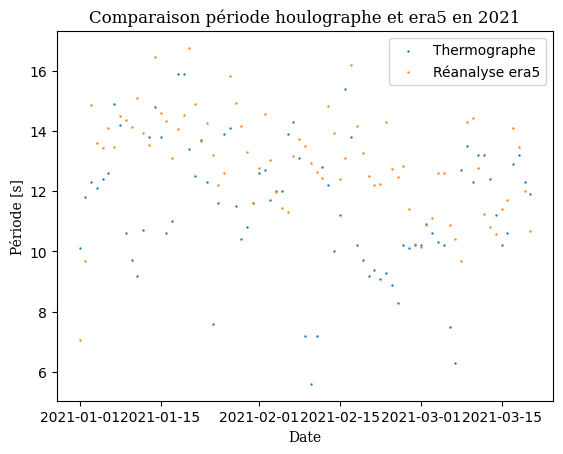

In [115]:
plt.scatter(period_houlographe_2021['DateTime'], period_houlographe_2021['Période'], s = .5, label = 'Thermographe')
plt.scatter(wave_era5_day_1987_2023['DateTime'], wave_era5_day_1987_2023['pp1d'], s=.5, label='Réanalyse era5')
plt.title('Comparaison période houlographe et era5 en 2021', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Période [s]', fontfamily = 'serif')
plt.legend()

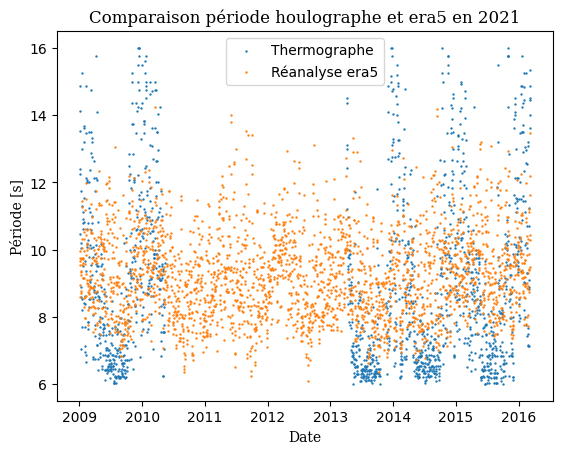

In [116]:
plt.scatter(nouv_houle['DateTime'], nouv_houle['Période'], s = .5, label = 'Thermographe')
plt.scatter(wave_era5_nouv['DateTime'], wave_era5_nouv['mwp'], s=.5, label='Réanalyse era5')
plt.title('Comparaison période houlographe et era5 en 2021', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Période [s]', fontfamily = 'serif')
plt.legend()

In [117]:
data_period = period_houlographe_2021.merge(wave_era5_day_1987_2023, on = 'DateTime')
data_period['pp1d s']=data_period['pp1d'].shift(-1)
matrix_corr = cross_correlation(data_period,'Période','pp1d',15)
find_lag(matrix_corr)

1

In [118]:
data_period_nouv = nouv_houle.merge(wave_era5_nouv, on='DateTime')
matrix_corr2 = cross_correlation(data_period_nouv,'Période','mwp',15)
find_lag(matrix_corr2)

0

In [119]:
data_period_nouv_f = data_period_nouv[(data_period_nouv['DateTime'] >= pd.to_datetime('2014-01-01'))]

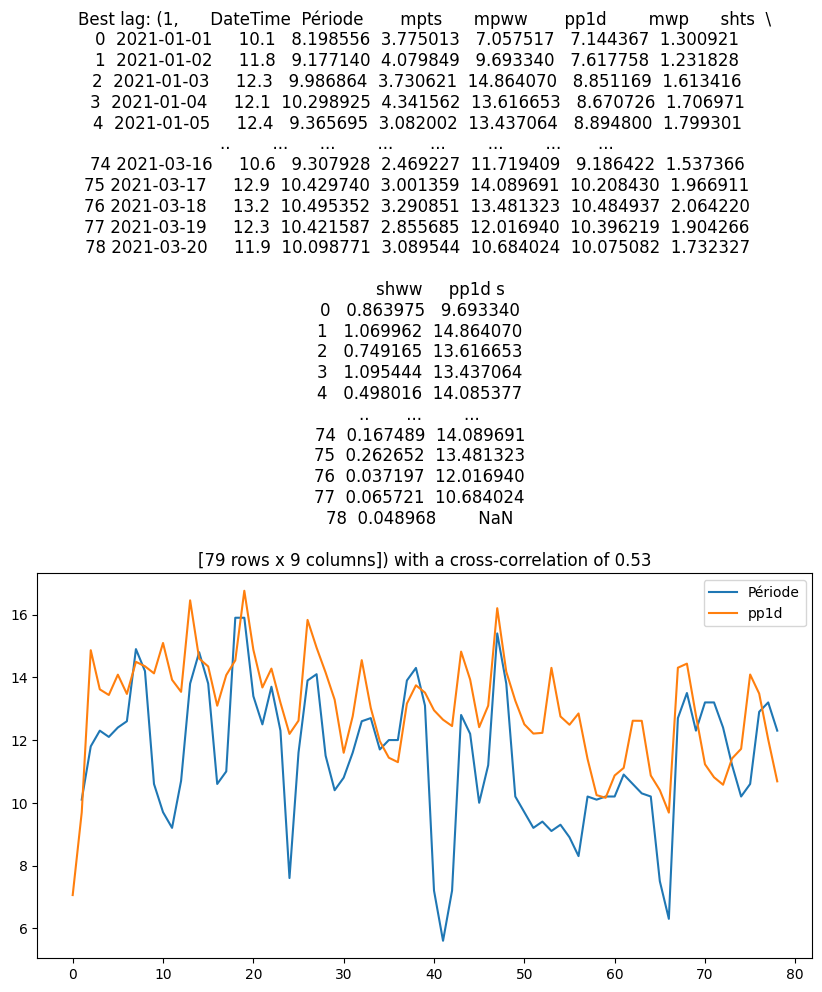

In [120]:
plot_with_best_lag(data_period,'Période','pp1d',15)

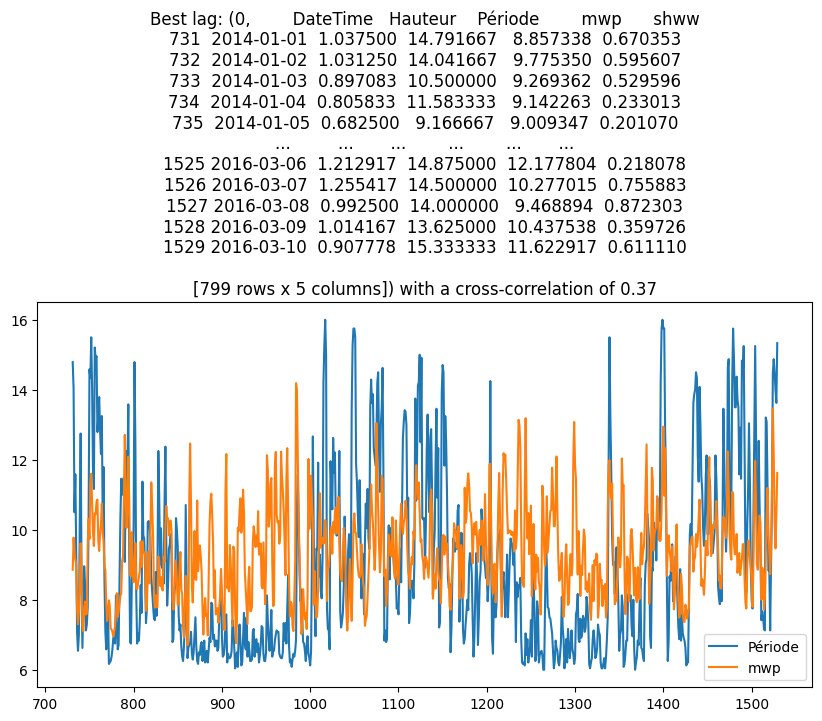

In [121]:
plot_with_best_lag(data_period_nouv_f,'Période','mwp',15)

In [122]:
print("corrélation without lag :", (np.corrcoef(data_period['Période'],data_period['pp1d'])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_period['Période']), data_period['pp1d'])))

corrélation without lag : 0.31510445139477156
rmse : 2.7224282791128975


In [123]:
print("corrélation with lag :", (np.corrcoef(data_period['Période'][:-1],(data_period['pp1d s'])[:-1])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_period['Période'][:-1]), data_period['pp1d s'][:-1])))

corrélation with lag : 0.5252763791074243
rmse : 2.4556574506154476


In [124]:
print("corrélation with nouv :", (np.corrcoef(data_period_nouv['Période'],data_period_nouv['mwp'])[0][1]))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_period_nouv['Période']), data_period_nouv['mwp'])))

corrélation with nouv : 0.4056829244720109
rmse : 2.377908856709903


Text(0, 0.5, 'Période era 5 [s]')

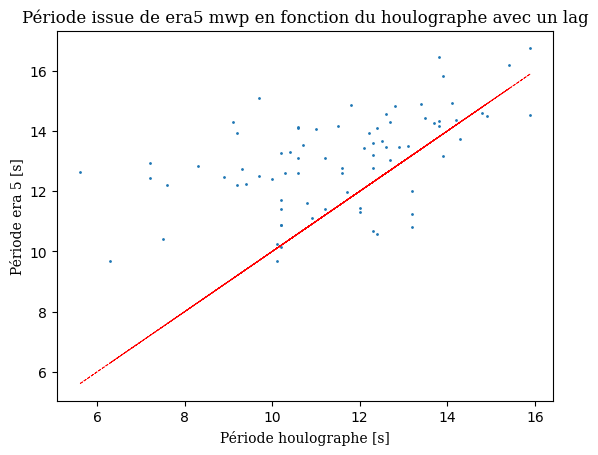

In [125]:
plt.scatter(data_period['Période'][:-1], data_period['pp1d s'].loc[:data_period.shape[0]-1][:-1], s = 1)
plt.plot(data_period['Période'][:-1], data_period['Période'][:-1], color = 'r', linestyle = '--', linewidth = .6)
plt.title('Période issue de era5 mwp en fonction du houlographe avec un lag', fontfamily = 'serif')
plt.xlabel('Période houlographe [s]', fontfamily = 'serif')
plt.ylabel('Période era 5 [s]', fontfamily = 'serif')

Text(0, 0.5, 'Période era 5 [s]')

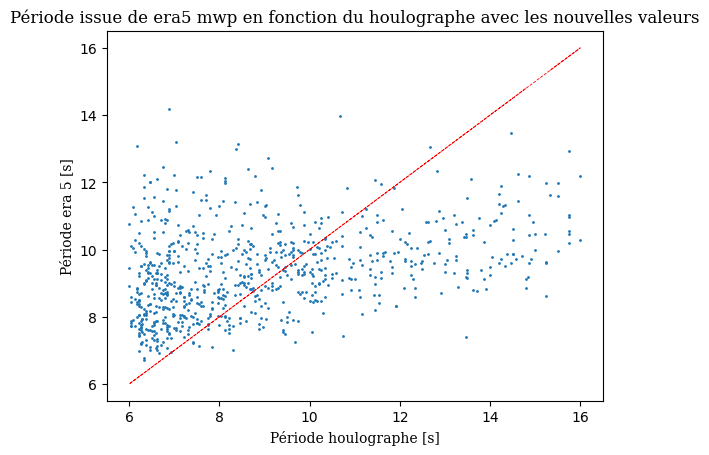

In [126]:
plt.scatter(data_period_nouv_f['Période'], data_period_nouv_f['mwp'], s = 1)
plt.plot(data_period_nouv_f['Période'], data_period_nouv_f['Période'], color = 'r', linestyle = '--', linewidth = .6)
plt.title('Période issue de era5 mwp en fonction du houlographe avec les nouvelles valeurs', fontfamily = 'serif')
plt.xlabel('Période houlographe [s]', fontfamily = 'serif')
plt.ylabel('Période era 5 [s]', fontfamily = 'serif')

In [127]:
data_period_nouv['Période'].shape,data_period_nouv['mwp'].loc[:data_period_nouv.shape[0]-1].shape

((1530,), (1530,))

## Régression linéaire

In [128]:
len = 45
# Train
X_train = np.array(data_heigh['shww s'].loc[:len]).reshape(-1, 1)
Y_train = np.array(data_heigh['Hauteur'].loc[:len])

#Test
X_test = np.array(data_heigh['shww s'].loc[len:61]).reshape(-1, 1)

model = linear_model.LinearRegression()

model.fit(X_train, Y_train)

#Pente & ordonnée à l'origine
slope = model.coef_[0]
intercept = model.intercept_

# Redressez Y en fonction de X
Y_test = slope * X_test + intercept

# Affichez les résultats
print("Pente (coefficient) :", slope)
print("Ordonnée à l'origine :", intercept)
print("r2 :", metrics.r2_score(np.array(data_heigh['Hauteur'].loc[len:61]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_heigh['Hauteur'].loc[len:61]), Y_test)))

Pente (coefficient) : 0.5937561095969089
Ordonnée à l'origine : 0.8802190521468283
r2 : -0.209312830798422
rmse : 0.1877052651318286


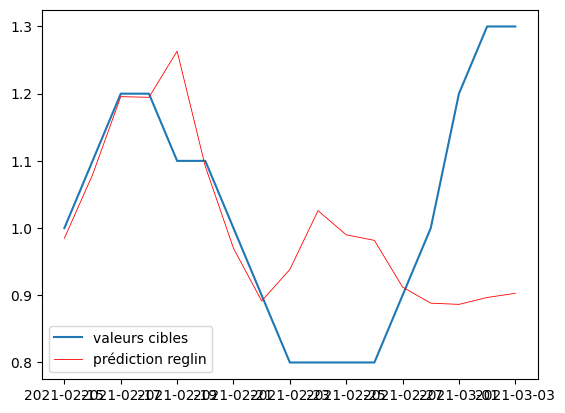

In [129]:
plt.plot(data_heigh['DateTime'].loc[len:61],data_heigh['Hauteur'].loc[len:61], label = 'valeurs cibles')
plt.plot(data_heigh['DateTime'].loc[len:61], slope * X_test + intercept, color = 'r', linewidth = .6, label = 'prédiction reglin')
plt.legend()

In [130]:
data_period_nouv_f.shape

(799, 5)

In [131]:
len = 700
# Train
X_train = np.array(data_period_nouv_f['mwp'].iloc[:len]).reshape(-1, 1)
Y_train = np.array(data_period_nouv_f['Période'].iloc[:len])

#Test
X_test = np.array(data_period_nouv_f['mwp'].iloc[len:799]).reshape(-1, 1)

model = linear_model.LinearRegression()

model.fit(X_train, Y_train)

#Pente & ordonnée à l'origine
slope = model.coef_[0]
intercept = model.intercept_

# Redressez Y en fonction de X
Y_test = slope * X_test + intercept

# Affichez les résultats
print("Pente (coefficient) :", slope)
print("Ordonnée à l'origine :", intercept)
print("r2 :", metrics.r2_score(np.array(data_period_nouv_f['Période'].iloc[len:799]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_period_nouv_f['Période'].iloc[len:799]), Y_test)))

Pente (coefficient) : 0.6297358863026498
Ordonnée à l'origine : 2.754754313455506
r2 : -0.9168054002270833
rmse : 3.2447122626286586


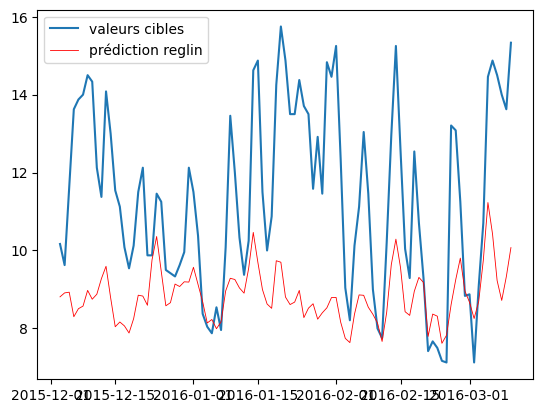

In [132]:
plt.plot(data_period_nouv_f['DateTime'].iloc[len:799],data_period_nouv_f['Période'].iloc[len:799], label = 'valeurs cibles')
plt.plot(data_period_nouv_f['DateTime'].iloc[len:799], slope * X_test + intercept, color = 'r', linewidth = .6, label = 'prédiction reglin')
plt.legend()

## Régression polynomiale

In [133]:
len = 45

# Train
X_train = np.array(data_heigh['shww s'].loc[:len]).reshape(-1, 1)
Y_train = np.array(data_heigh['Hauteur'].loc[:len])

#Test
X_test = np.array(data_heigh['shww s'][len:61]).reshape(-1, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)

r2 : -0.29365502824168654
rmse : 0.18372890598156158


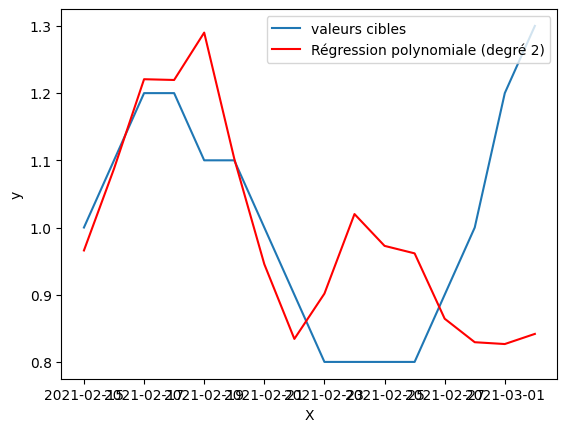

In [134]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

# Test
X_test_poly = poly_features.transform(X_test)
Y_test = lin_reg.predict(X_test_poly)

# Erreur
print("r2 :", metrics.r2_score(np.array(data_heigh['Hauteur'].iloc[len:61]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_heigh['Hauteur'].iloc[len:61]), Y_test)))

# Tracer les données et la courbe de régression polynomiale
plt.plot(data_heigh['DateTime'].iloc[len:61],data_heigh['Hauteur'].iloc[len:61], label = 'valeurs cibles')
plt.plot(data_heigh['DateTime'].iloc[len:61], Y_test, 'r-', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


r2 : -0.8234065012600109
rmse : 3.1646736240599096


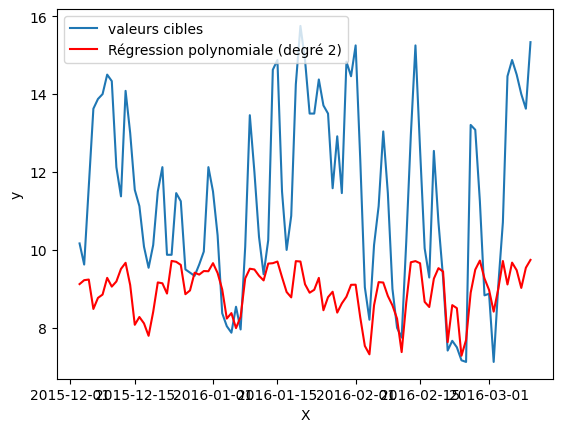

In [135]:
len = 700

# Train
X_train = np.array(data_period_nouv_f['mwp'].iloc[:len]).reshape(-1, 1)
Y_train = np.array(data_period_nouv_f['Période'].iloc[:len])

#Test
X_test = np.array(data_period_nouv_f['mwp'][len:1530]).reshape(-1, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

# Test
X_test_poly = poly_features.transform(X_test)
Y_test = lin_reg.predict(X_test_poly)

# Erreur
print("r2 :", metrics.r2_score(np.array(data_period_nouv_f['Période'].iloc[len:1530]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_period_nouv_f['Période'].iloc[len:799]), Y_test)))

# Tracer les données et la courbe de régression polynomiale
plt.plot(data_period_nouv_f['DateTime'].iloc[len:799],data_period_nouv_f['Période'].iloc[len:799], label = 'valeurs cibles')
plt.plot(data_period_nouv_f['DateTime'].iloc[len:799], Y_test, 'r-', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Detrending

In [136]:
import statsmodels.api as sm

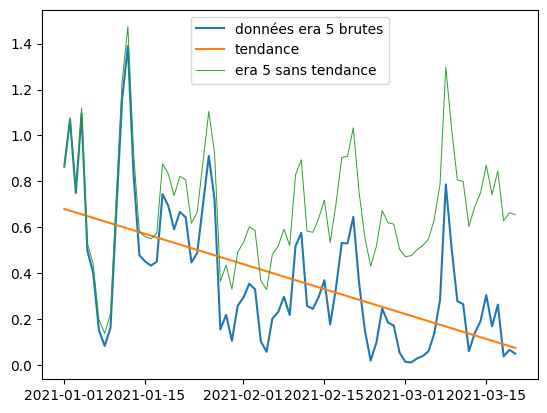

In [137]:
# detrending era 5
temps_numerique = np.arange(wave_era5_day_1987_2023.shape[0])

# Ajuster une régression linéaire
model = LinearRegression()
model.fit(temps_numerique.reshape(-1, 1), np.array(wave_era5_day_1987_2023['shww']))

# Obtenir les coefficients de la tendance linéaire
pente = model.coef_[0]
intercept = model.intercept_

plt.plot(wave_era5_day_1987_2023['DateTime'], wave_era5_day_1987_2023['shww'], label = 'données era 5 brutes')
plt.plot(wave_era5_day_1987_2023['DateTime'], pente * temps_numerique[:wave_era5_day_1987_2023.shape[0]] + intercept, label = 'tendance')
plt.plot(wave_era5_day_1987_2023['DateTime'], wave_era5_day_1987_2023['shww'] - pente * temps_numerique[:wave_era5_day_1987_2023.shape[0]], linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

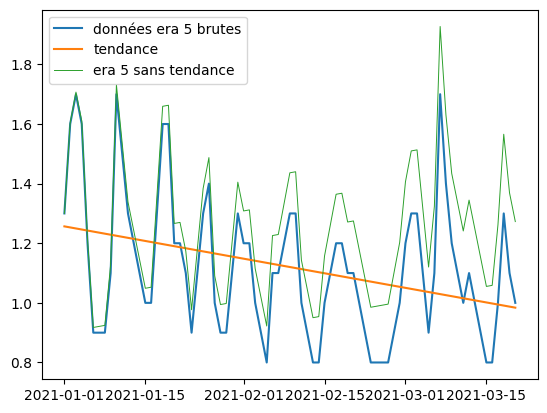

In [138]:
# detrending données capteur
temps_numerique_capt = np.arange(wave_houlographe_2021.shape[0])

# Ajuster une régression linéaire
model_capt = LinearRegression()
model_capt.fit(temps_numerique_capt.reshape(-1, 1), np.array(wave_houlographe_2021['Hauteur']))

# Obtenir les coefficients de la tendance linéaire
pente_capt = model_capt.coef_[0]
intercept_capt = model_capt.intercept_

plt.plot(wave_houlographe_2021['DateTime'], wave_houlographe_2021['Hauteur'], label = 'données era 5 brutes')
plt.plot(wave_houlographe_2021['DateTime'], pente_capt * temps_numerique_capt + intercept_capt, label = 'tendance')
plt.plot(wave_houlographe_2021['DateTime'], wave_houlographe_2021['Hauteur'] - pente_capt * temps_numerique_capt, linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

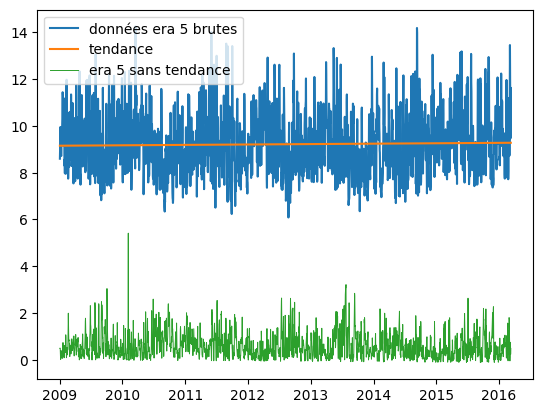

In [139]:
# detrending era 5
temps_numerique = np.arange(wave_era5_nouv.shape[0])

# Ajuster une régression linéaire
model = LinearRegression()
model.fit(temps_numerique.reshape(-1, 1), np.array(wave_era5_nouv['mwp']))

# Obtenir les coefficients de la tendance linéaire
pente = model.coef_[0]
intercept = model.intercept_

plt.plot(wave_era5_nouv['DateTime'], wave_era5_nouv['mwp'], label = 'données era 5 brutes')
plt.plot(wave_era5_nouv['DateTime'], pente * temps_numerique[:wave_era5_nouv.shape[0]] + intercept, label = 'tendance')
plt.plot(wave_era5_nouv['DateTime'], wave_era5_nouv['shww'] - pente * temps_numerique[:wave_era5_nouv.shape[0]], linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

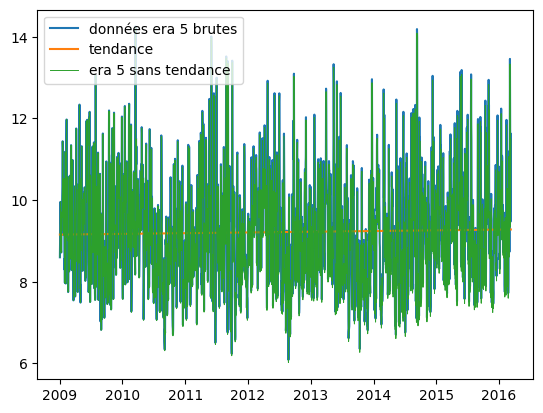

In [140]:
# detrending era 5
temps_numerique = np.arange(wave_era5_nouv.shape[0])

# Ajuster une régression linéaire
model = LinearRegression()
model.fit(temps_numerique.reshape(-1, 1), np.array(wave_era5_nouv['mwp']))

# Obtenir les coefficients de la tendance linéaire
pente = model.coef_[0]
intercept = model.intercept_

plt.plot(wave_era5_nouv['DateTime'], wave_era5_nouv['mwp'], label = 'données era 5 brutes')
plt.plot(wave_era5_nouv['DateTime'], pente * temps_numerique[:wave_era5_nouv.shape[0]] + intercept, label = 'tendance')
plt.plot(wave_era5_nouv['DateTime'], wave_era5_nouv['mwp'] - pente * temps_numerique[:wave_era5_nouv.shape[0]], linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

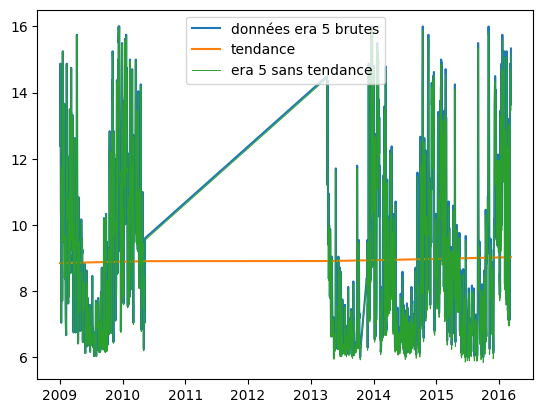

In [141]:
# detrending données capteur
temps_numerique_capt = np.arange(nouv_houle.shape[0])

# Ajuster une régression linéaire
model_capt = LinearRegression()
model_capt.fit(temps_numerique_capt.reshape(-1, 1), np.array(nouv_houle['Période']))

# Obtenir les coefficients de la tendance linéaire
pente_capt = model_capt.coef_[0]
intercept_capt = model_capt.intercept_

plt.plot(nouv_houle['DateTime'], nouv_houle['Période'], label = 'données era 5 brutes')
plt.plot(nouv_houle['DateTime'], pente_capt * temps_numerique_capt + intercept_capt, label = 'tendance')
plt.plot(nouv_houle['DateTime'], nouv_houle['Période'] - pente_capt * temps_numerique_capt, linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

## regression polynomiale

In [142]:
len = 45

# Train
X_train = np.array((data_heigh['shww'] - pente * temps_numerique[:wave_era5_day_1987_2023.shape[0]]).shift(-1).loc[:len]).reshape(-1, 1)
Y_train = np.array((data_heigh['Hauteur'] - pente_capt * temps_numerique_capt).loc[:len])

#Test
X_test = np.array((data_heigh['shww'] - pente * temps_numerique[:wave_era5_day_1987_2023.shape[0]]).shift(-1)[len:61]).reshape(-1, 1)

# Créer un objet PolynomialFeatures pour transformer les caractéristiques
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)


ValueError: operands could not be broadcast together with shapes (79,) (1530,) 

r2 : -0.4977604834562648
rmse : 0.20889512667141108


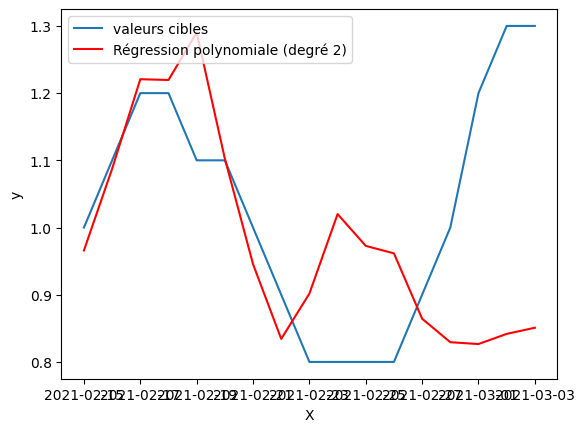

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

# Test
X_test_poly = poly_features.transform(X_test)
Y_test = lin_reg.predict(X_test_poly)

# Erreur
print("r2 :", metrics.r2_score(np.array(data_heigh['Hauteur'].loc[len:61]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_heigh['Hauteur'].loc[len:61]), Y_test)))

plt.plot(data_heigh['DateTime'].loc[len:61],data_heigh['Hauteur'].loc[len:61], label = 'valeurs cibles')
plt.plot(data_heigh['DateTime'].loc[len:61], Y_test, 'r-', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
len = 700

# Train
X_train = np.array((data_period_nouv_f['mwp'] - pente * temps_numerique[:data_period_nouv_f.shape[0]]).loc[:len]).reshape(-1, 1)
Y_train = np.array((data_period_nouv_f['Période'] - pente_capt * temps_numerique_capt).loc[:len])

#Test
X_test = np.array((data_period_nouv_f['mwp'] - pente * temps_numerique[:data_period_nouv_f.shape[0]])[len:130]).reshape(-1, 1)

# Créer un objet PolynomialFeatures pour transformer les caractéristiques
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)


r2 : -0.4476772729623222
rmse : 2.9533129282660235


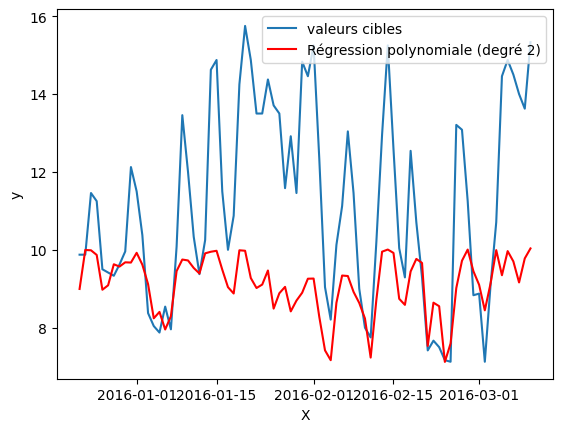

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

# Test
X_test_poly = poly_features.transform(X_test)
Y_test = lin_reg.predict(X_test_poly)

# Erreur
print("r2 :", metrics.r2_score(np.array(data_period_nouv['Période'].loc[len:1530]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_period_nouv['Période'].loc[len:1530]), Y_test)))

plt.plot(data_period_nouv['DateTime'].loc[len:1530],data_period_nouv['Période'].loc[len:1530], label = 'valeurs cibles')
plt.plot(data_period_nouv['DateTime'].loc[len:1530], Y_test, 'r-', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

##  Filtre

In [ ]:
len_train = 45
r = 15 #to check
N = 61 #also
X_train = np.ones((len_train, (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X_train[:, j] = np.roll(data_heigh['shww'].iloc[:len_train], r - j)

Y = np.array(data_heigh['Hauteur'].iloc[:len_train]).reshape(-1, 1)
Y.shape

X_test = np.ones((N - len_train, (2*r + 1) + 1)) #rajout du biais
print(X_test.shape)
for j in range((2*r + 1) - 1):
    X_test[:, j] = np.roll(data_heigh['shww'].iloc[len_train:N], r - j)

(16, 32)


In [ ]:
h, residuals, _, _ = np.linalg.lstsq(X_train, Y, rcond=None)
print("corrélation :", np.corrcoef(np.array(data_heigh['Hauteur'].iloc[len:N]).reshape(1, 16),np.dot(X_test, h).reshape(1, 16))[0, 1])
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(data_heigh['Hauteur'].iloc[len_train:N]), np.dot(X_test, h))))

corrélation : -0.48426932222451147
rmse : 0.28377373295156516


((17,), (16, 1), (16, 32), (32, 1))

In [ ]:
plt.plot(temp_2016['DateTime'].loc[len_train:], temp_2016['Temperature'].loc[len_train:], label = 'Température thermographe brute')
plt.plot(sst_era5_day_2016['DateTime'].iloc[len_train:temp_2016.shape[0]], np.dot(X_test, h), label = 'Température era5 convoluée')
plt.title('Résultat convolution', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')
plt.legend()

## Création dataframe 

In [ ]:
X = np.ones((sst_era5_day.shape[0], (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X[:, j] = np.roll(sst_era5_day['sst'], r - j)

sst_era5_adjusted = pd.concat([sst_era5_day, pd.DataFrame(np.dot(X, h))], axis = 1)
sst_era5_adjusted = sst_era5_adjusted.drop(columns='sst')
sst_era5_adjusted = sst_era5_adjusted.rename(columns = {0:'sst'})
sst_era5_adjusted

In [ ]:
plt.plot(sst_era5_day['DateTime'], sst_era5_day['sst'], color = 'r', label = 'données brutes', linewidth = .5)
plt.plot(sst_era5_adjusted['DateTime'], sst_era5_adjusted['sst'], color = 'b', label = 'Données ajustées', linewidth = .5)
plt.legend()

In [ ]:
# Définir la colonne date comme index dans les deux DataFrames
temp.set_index('DateTime', inplace=True)
sst_era5_day.set_index('DateTime', inplace=True)

# Fusionner les deux DataFrames en utilisant la méthode 'outer' pour inclure toutes les dates de 'df_temp' et 'df_autre'
fill_sst = pd.merge(temp, sst_era5_day, left_index=True, right_index=True, how='outer')

# Remplir les valeurs manquantes de température avec les valeurs existantes de 'df_autre'
fill_sst['sst'] = fill_sst['Temperature'].fillna(fill_sst['sst'])

# Réinitialiser l'index pour avoir une colonne date
fill_sst.reset_index(inplace=True)
fill_sst = fill_sst.drop(columns='Temperature')
fill_sst = fill_sst.rename(columns={'sst':'Temperature'})
temp = temp.reset_index()

In [ ]:
plt.scatter(fill_sst['DateTime'], fill_sst['Temperature'], s = 1)
plt.title('Température complétée à 8m sur la pente externe', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')

# Indicateurs

## MMM 

In [ ]:
monthly_means = fill_sst.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means['MMM'] = monthly_means['Temperature'].rolling(window=12, min_periods=1).max()

In [ ]:
monthly_means['Mois'] = monthly_means['DateTime'].dt.to_period('M')
fill_sst['Mois'] = fill_sst['DateTime'].dt.to_period('M')
fill_sst = pd.merge(fill_sst, monthly_means[['Mois', 'MMM']], on='Mois', how='left')
fill_sst.drop(columns='Mois', inplace = True)

In [ ]:
plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Température')
plt.plot(fill_sst['DateTime'], fill_sst['MMM'], color = 'r', label = 'MMM')
plt.legend()
plt.title('Température et valeurs de MMM pour chaque année', fontfamily = 'serif')
plt.xlabel('Température [°C]', fontfamily = 'serif')
plt.ylabel('Date', fontfamily = 'serif')

## DHW

In [ ]:
fill_sst['hotspot / 7'] = (fill_sst['Temperature'] - fill_sst['MMM'])/7
fill_sst['hotspot / 7'][fill_sst['hotspot / 7'] < 0] = 0

In [ ]:
fill_sst['dhw'] = fill_sst['hotspot / 7'].rolling(window=7*35, min_periods=1).sum()
fill_sst = fill_sst.drop(columns='hotspot / 7')

In [ ]:
plt.plot(fill_sst['DateTime'], fill_sst['dhw'])
plt.xticks(rotation=45, ha='right')
plt.title('Degree Heating Week (DHW) pour X = 35 semaines', fontfamily = 'serif')
plt.xlabel('Date',fontfamily = 'serif' )
plt.ylabel('DHW [°C/weeks]')

## Acute thermal stress

In [ ]:
threshold = 0.8
fill_sst['excess'] = fill_sst.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
fill_sst['excess'] = fill_sst['excess'].rolling(window = 140, min_periods= 140).sum()
fill_sst['Acute thermal stress'] = fill_sst.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
fill_sst.drop(columns='excess', inplace = True)
fill_sst

In [ ]:
plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Temperature')
plt.plot(fill_sst['DateTime'], fill_sst['Acute thermal stress']*30, color = 'r', label = 'Acute thermal stress')
plt.title('Acute thermal stress avec s = MMM + 0.8°C et Y = 140 jours', fontfamily = 'serif')
plt.ylabel('[°C]', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylim(23, 32)
plt.legend()

## Thermal trajectory

In [ ]:
threshold = 0.5

fill_sst['thermal_stress_category'] = ''

for i in range(fill_sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(fill_sst['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > fill_sst['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > fill_sst['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        fill_sst['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        fill_sst['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if fill_sst['Temperature'].iloc[i-10] >= fill_sst['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        fill_sst['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(fill_sst['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > fill_sst['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        fill_sst['thermal_stress_category'].iloc[i] = 0
    
    if fill_sst['thermal_stress_category'].iloc[i] == '':
        fill_sst['thermal_stress_category'].iloc[i] = 0.5

In [ ]:
plt.figure(figsize=(10, 6))

for category in range(4):
    category_data = fill_sst[fill_sst['thermal_stress_category'] == category]
    plt.scatter(category_data['DateTime'], category_data['Temperature'], label=f'Category {category}', s = 10)

plt.legend()
plt.title('Temperature Data for Different Thermal Stress Categories')
plt.xlabel('Date')
plt.ylabel('Temperature')

## Comparaison indicateurs de température entre era 5 et capteurs

In [ ]:
sst_test = sst_era5_adjusted[(sst_era5_adjusted['DateTime'] >= pd.to_datetime('2016-01-01'))&(sst_era5_adjusted['DateTime'] <= pd.to_datetime('2023-08-28'))]

In [ ]:
sst_test_2010 = sst_era5_adjusted[(sst_era5_adjusted['DateTime'] >= pd.to_datetime('2010-06-21'))&(sst_era5_adjusted['DateTime'] <= pd.to_datetime('2014-12-31'))]

### MMM

In [ ]:
# accumulation window = 3 mois
monthly_means_era5 = sst_test.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_era5['MMM'] = monthly_means_era5['sst'].rolling(window=12, min_periods=1).max()

# accumulation window = 3 mois
monthly_means_capt = temp_2016.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_capt['MMM'] = monthly_means_capt['Temperature'].rolling(window=12, min_periods=1).max()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# Premier sous-graphique
axs[0].plot(monthly_means_capt['DateTime'], monthly_means_capt['MMM'], label = 'in situ', linewidth = 2)
axs[0].plot(monthly_means_era5['DateTime'], monthly_means_era5['MMM'], linewidth = 2, label = 'era 5 filtré')
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('MMM [°C]', fontfamily = 'serif')
axs[0].legend()

# Deuxième sous-graphique
axs[1].scatter(monthly_means_capt['MMM'], monthly_means_era5['MMM'], s = 1)
axs[1].plot(np.linspace(28, 30, 10), np.linspace(28, 30, 10), color = 'r', linestyle = '--')
axs[1].set_xlabel('MMM era5 filtré [°C]', fontfamily = 'serif')
axs[1].set_ylabel('MMM in situ [°C]', fontfamily = 'serif')
axs[1].set_ylim(28.5, 30)
axs[1].set_xlim(28.5, 30)
axs[1].legend()




In [ ]:
print("rmse :", np.sqrt(metrics.mean_squared_error(monthly_means_capt['MMM'], monthly_means_era5['MMM'])))

In [ ]:
# Capteur
monthly_means_capt['Mois'] = monthly_means_capt['DateTime'].dt.to_period('M')
temp_2016['Mois'] = temp_2016['DateTime'].dt.to_period('M')
temp_2016 = pd.merge(temp_2016, monthly_means_capt[['Mois', 'MMM']], on='Mois', how='left')
temp_2016.drop(columns='Mois', inplace = True)

# era 5
monthly_means_era5['Mois'] = monthly_means_era5['DateTime'].dt.to_period('M')
sst_test['Mois'] = sst_test['DateTime'].dt.to_period('M')
sst_test = pd.merge(sst_test, monthly_means_era5[['Mois', 'MMM']], on='Mois', how='left')
sst_test.drop(columns='Mois', inplace = True)

In [ ]:
fig, axs = plt.subplots(1, 2)

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'Température')
axs[0].plot(temp_2016['DateTime'], temp_2016['MMM'], color = 'r', label = 'MMM')
axs[0].set_title('Capteur')
axs[0].set_ylim(25.5, 31)
axs[0].legend()

# Deuxième sous-graphique
axs[1].plot(sst_test['DateTime'], sst_test['sst'], label = 'Température')
axs[1].plot(sst_test['DateTime'], sst_test['MMM'], color = 'r', label = 'MMM')
axs[1].set_title('Era 5')
axs[1].set_ylim(25.5, 31)
axs[1].legend()

In [ ]:
ecart = 0.16
plt.plot(monthly_means_capt['DateTime'], monthly_means_capt['MMM'], label = 'capteur', linewidth = 1)
plt.plot(monthly_means_era5['DateTime'], monthly_means_era5['MMM'], linewidth = 1, label = 'era 5')
plt.fill_between(monthly_means_era5['DateTime'], monthly_means_era5['MMM'] - ecart, monthly_means_era5['MMM'] + ecart, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('MMM [°C]', fontfamily = 'serif')
plt.title('Incertitude MMM', fontfamily = 'serif')

In [ ]:
# Vérification
test = pd.merge(sst_test_2010, temp_2010, on = 'DateTime', how = 'inner')

# accumulation window = 3 mois
monthly_means_era5 = sst_test_2010.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_era5['MMM_era5'] = monthly_means_era5['sst'].rolling(window=12, min_periods=1).max()

# accumulation window = 3 mois
monthly_means_capt = temp_2010.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_capt['MMM_capt'] = monthly_means_capt['Temperature'].rolling(window=12, min_periods=1).max()

In [ ]:
# Capteur
monthly_means_capt['Mois'] = monthly_means_capt['DateTime'].dt.to_period('M')
monthly_means_era5['Mois'] = monthly_means_era5['DateTime'].dt.to_period('M')
test['Mois'] = test['DateTime'].dt.to_period('M')
test = pd.merge(test, monthly_means_capt[['Mois', 'MMM_capt']], on='Mois', how='left')
test = pd.merge(test, monthly_means_era5[['Mois', 'MMM_era5']], on='Mois', how='left')
test.drop(columns='Mois', inplace = True)

In [ ]:
ecart = 0.16
plt.plot(monthly_means_capt['DateTime'], monthly_means_capt['MMM_capt'], label = 'capteur', linewidth = 1)
plt.plot(monthly_means_era5['DateTime'], monthly_means_era5['MMM_era5'], linewidth = 1, label = 'era 5')
plt.fill_between(monthly_means_era5['DateTime'], monthly_means_era5['MMM_era5'] - ecart, monthly_means_era5['MMM_era5'] + ecart, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('MMM [°C]', fontfamily = 'serif')
plt.title('Incertitude MMM', fontfamily = 'serif')

### DHW

In [ ]:
temp_2016['hotspot / 7'] = (temp_2016['Temperature'] - temp_2016['MMM'])/7
temp_2016['hotspot / 7'][temp_2016['hotspot / 7'] < 0] = 0

sst_test['hotspot / 7'] = (sst_test['sst'] - sst_test['MMM'])/7
sst_test['hotspot / 7'][sst_test['hotspot / 7'] < 0] = 0

In [ ]:
temp_2016['dhw'] = temp_2016['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
temp_2016 = temp_2016.drop(columns='hotspot / 7')

sst_test['dhw'] = sst_test['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
sst_test = sst_test.drop(columns='hotspot / 7')

In [ ]:
fig, axs = plt.subplots(1, 2)

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['dhw'])
axs[0].set_title('Capteur')
axs[0].set_ylim(0, 3)

# Deuxième sous-graphique
axs[1].plot(sst_test['DateTime'], sst_test['dhw'])
axs[1].set_title('Era 5')
axs[1].set_ylim(0, 3)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['dhw'], label = 'in situ', linewidth = 2)
axs[0].plot(sst_test['DateTime'], sst_test['dhw'], linewidth = 2, label = 'era 5 filtré')
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('DHW [°C/weeks]', fontfamily = 'serif')
axs[0].legend()

# Deuxième sous-graphique
axs[1].scatter(temp_2016['dhw'], sst_test['dhw'], s = 1)
axs[1].plot(np.linspace(0, 2.5, 10), np.linspace(0, 2.5, 10), color = 'r', linestyle = '--')
axs[1].set_xlabel('DHW era5 convolué [°C/weeks]', fontfamily = 'serif')
axs[1].set_ylabel('DHW thermographe [°C/weeks]', fontfamily = 'serif')
axs[1].set_ylim(0, 2)
axs[1].set_xlim(0,2)
axs[1].legend()

In [ ]:
print("rmse :", np.sqrt(metrics.mean_squared_error(temp_2016['dhw'], sst_test['dhw'])))

#### Calcul incertitude

In [ ]:
ecart = 0.25
plt.plot(temp_2016['DateTime'], temp_2016['dhw'])
plt.plot(sst_test['DateTime'], sst_test['dhw'], linewidth = 2, label = 'era 5')
plt.fill_between(sst_test['DateTime'], sst_test['dhw'] - 0.24, sst_test['dhw'] + 0.24, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.title('DHW')

#### Vérification

In [ ]:
temp = temp.reset_index()

In [ ]:
temp_2010 = temp[(temp['DateTime'].dt.year >=2011) & (temp['DateTime'].dt.year <=2015)]
temp_2010 = temp_2010.reset_index()

In [ ]:
sst = sst_era5_adjusted[(sst_era5_adjusted['DateTime'] >= pd.to_datetime('2011-04-02'))&(sst_era5_adjusted['DateTime'] <= pd.to_datetime('2015-12-31'))]

In [ ]:
# accumulation window = 3 mois
monthly_means_test = temp_2010.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_test['MMM'] = monthly_means_test['Temperature'].rolling(window=12, min_periods=1).max()

monthly_means_test['Mois'] = monthly_means_test['DateTime'].dt.to_period('M')
temp_2010['Mois'] = temp_2010['DateTime'].dt.to_period('M')
temp_2010 = pd.merge(temp_2010, monthly_means_test[['Mois', 'MMM']], on='Mois', how='left')
temp_2010.drop(columns='Mois', inplace = True)

temp_2010['hotspot / 7'] = (temp_2010['Temperature'] - temp_2010['MMM'])/7
temp_2010['hotspot / 7'][temp_2010['hotspot / 7'] < 0] = 0

temp_2010 = temp_2010.loc[91:]
temp_2010['dhw'] = temp_2010['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
temp_2010 = temp_2010.drop(columns='hotspot / 7')

# accumulation window = 3 mois
monthly_means_test = sst.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_test['MMM'] = monthly_means_test['sst'].rolling(window=12, min_periods=1).max()

monthly_means_test['Mois'] = monthly_means_test['DateTime'].dt.to_period('M')
sst['Mois'] = sst['DateTime'].dt.to_period('M')
sst = pd.merge(sst, monthly_means_test[['Mois', 'MMM']], on='Mois', how='left')
sst.drop(columns='Mois', inplace = True)

sst['hotspot / 7'] = (sst['sst'] - sst['MMM'])/7
sst['hotspot / 7'][sst['hotspot / 7'] < 0] = 0

sst = sst.loc[91:]
sst['dhw'] = sst['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
sst = sst.drop(columns='hotspot / 7')

plt.plot(temp_2010['DateTime'], temp_2010['dhw'], linewidth = .6, label = 'DHW capteur', color = 'r')
plt.plot(sst['DateTime'], sst['dhw'], linewidth = .6, label = 'DHW era 5 filtré')
plt.fill_between(sst['DateTime'], sst['dhw'] - ecart, sst['dhw'] + ecart, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('DHW [°C/weeks]', fontfamily = 'serif')
plt.title('Incertitudes DHW sur un autre échantillon', fontfamily = 'serif')

### Acute thermal stress

In [ ]:
threshold = 0.5
temp_2016['excess'] = temp_2016.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
temp_2016['excess'] = temp_2016['excess'].rolling(window = 140, min_periods= 140).sum()
temp_2016['Acute thermal stress'] = temp_2016.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
temp_2016.drop(columns='excess', inplace = True)

sst_test['excess'] = sst_test.apply(lambda row: 1 if row['sst'] > row['MMM']+threshold else 0, axis=1)
sst_test['excess'] = sst_test['excess'].rolling(window = 140, min_periods= 140).sum()
sst_test['Acute thermal stress'] = sst_test.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
# sst_test.drop(columns='excess', inplace = True)

In [ ]:
threshold = 0.5
temp_2016['excess'] = temp_2016.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
temp_2016['excess'] = temp_2016['excess'].rolling(window = 140, min_periods= 140).sum()
temp_2016['Acute thermal stress'] = temp_2016.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
temp_2016.drop(columns='excess', inplace = True)

sst_test['excess'] = sst_test.apply(lambda row: 1 if row['sst'] > row['MMM']+threshold else 0, axis=1)
sst_test['excess'] = sst_test['excess'].rolling(window = 140, min_periods= 140).sum()
sst_test['Acute thermal stress'] = sst_test.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
# sst_test.drop(columns='excess', inplace = True)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'Température')
axs[0].plot(temp_2016['DateTime'], temp_2016['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[0].set_title('ATS Capteur', fontfamily = 'serif')
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
axs[1].plot(sst_test['DateTime'], sst_test['sst'], label = 'Température')
axs[1].plot(sst_test['DateTime'], sst_test['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[1].set_title('ATS Era 5', fontfamily = 'serif')
axs[1].set_ylim(25, 30)
axs[1].legend()

#### Calcul incertitude

In [ ]:
deltaT = 0.09
deltaMMM = 0.08

In [ ]:
sst_test['excess max'] = sst_test.apply(lambda row: 1 if row['sst'] + deltaT > row['MMM']+threshold - deltaMMM else 0, axis=1)
sst_test['excess max'] = sst_test['excess max'].rolling(window = 140, min_periods= 90).sum()
sst_test['Acute thermal stress plage'] = sst_test.apply(lambda row: 1 if row['excess max'] > 0 else 0, axis=1)
sst_test.drop(columns='excess max', inplace = True)

In [ ]:
plt.figure(figsize=(10,20))
fig, axs = plt.subplots(1, 2, figsize = (14, 8))


# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'Température')
axs[0].plot(temp_2016['DateTime'], temp_2016['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[0].set_title('ATS Capteur', fontfamily = 'serif')
axs[0].set_ylim(25, 30)
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('Temperature [°C]', fontfamily = 'serif')
axs[0].legend()

# deuxième graphique
axs[1].plot(sst_test['DateTime'], sst_test['sst'], label = 'Température')
axs[1].plot(sst_test['DateTime'], sst_test['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[1].fill_between(sst_test['DateTime'], sst_test['Acute thermal stress plage']*29, color='skyblue', alpha=0.5, label = 'incertitude')
axs[1].set_title('ATS Era 5', fontfamily = 'serif')
axs[1].set_ylim(25, 30)
axs[1].set_xlabel('Date', fontfamily = 'serif')
axs[1].set_ylabel('Temperature [°C]', fontfamily = 'serif')
axs[1].legend()

#### Vérification

In [ ]:
threshold = 0.5
temp_2010['excess'] = temp_2010.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
temp_2010['excess'] = temp_2010['excess'].rolling(window = 140, min_periods= 140).sum()
temp_2010['Acute thermal stress'] = temp_2010.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
temp_2010.drop(columns='excess', inplace = True)

threshold = 0.5
sst['excess'] = sst.apply(lambda row: 1 if row['sst'] > row['MMM']+threshold else 0, axis=1)
sst['excess'] = sst['excess'].rolling(window = 140, min_periods= 140).sum()
sst['Acute thermal stress'] = sst.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
sst.drop(columns='excess', inplace = True)

In [ ]:
sst['excess max'] = sst.apply(lambda row: 1 if row['sst'] + deltaT > row['MMM']+threshold - deltaMMM else 0, axis=1)
sst['excess max'] = sst['excess max'].rolling(window = 140, min_periods= 140).sum()
sst['Acute thermal stress plage'] = sst.apply(lambda row: 1 if row['excess max'] > 0 else 0, axis=1)
sst.drop(columns='excess max', inplace = True)

In [ ]:
plt.figure(figsize=(10,20))
fig, axs = plt.subplots(1, 2, figsize = (14, 8))


# Premier sous-graphique
axs[0].plot(temp_2010['DateTime'], temp_2010['Temperature'], label = 'Température')
axs[0].plot(temp_2010['DateTime'], temp_2010['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# deuxième graphique
axs[1].plot(sst['DateTime'], sst['sst'], label = 'Température')
axs[1].plot(sst['DateTime'], sst['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[1].fill_between(sst['DateTime'], sst['Acute thermal stress plage']*29, color='skyblue', alpha=0.5, label = 'incertitude')
axs[1].set_title('Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

### Thermal trajectory

In [ ]:
deltaT = 0.09
deltaMMM = 0.08

In [ ]:
threshold = 1.5

# Capteur
temp_2016['thermal_stress_category'] = ''

for i in range(temp_2016.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(temp_2016['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > temp_2016['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > temp_2016['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        temp_2016['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        temp_2016['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if temp_2016['Temperature'].iloc[i-10] >= temp_2016['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        temp_2016['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    if temp_2016['thermal_stress_category'].iloc[i] == '':
        temp_2016['thermal_stress_category'].iloc[i] = 0

'''    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(temp_2016['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > temp_2016['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        temp_2016['thermal_stress_category'].iloc[i] = 0'''
    
    

# Era 5
threshold = 1.5


sst_test['thermal_stress_category'] = ''
sst_test['thermal_stress_category_plage'] = ''

for i in range(sst_test.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(sst_test['sst'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > sst_test['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > sst_test['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT > sst_test['MMM'].iloc[i] - deltaMMM)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT > sst_test['MMM'].iloc[i] + threshold - deltaMMM)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        sst_test['thermal_stress_category'].iloc[i] = 2
    
    if nb_depassant_MMM_plage > nb_depassant_MMM_threshold_plage:
        sst_test['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        sst_test['thermal_stress_category'].iloc[i] = 3
    
    if nb_depassant_MMM_threshold_plage >= 2:
        sst_test['thermal_stress_category_plage'].iloc[i] = 1
    
    # Condition 1
    if sst_test['sst'].iloc[i-10] >= sst_test['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        sst_test['thermal_stress_category'].iloc[i] = 1
    
    if sst_test['sst'].iloc[i-10] + deltaT >= sst_test['MMM'].iloc[i-10] - deltaMMM and nb_depassant_MMM_plage == 1:
        sst_test['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 0
    '''derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(sst_test['sst'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > sst_test['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in derniers_jours if valeur + deltaT> sst_test['MMM'].iloc[i] + threshold - deltaMMM)

    if nb_depassant_MMM_threshold == 0:
        sst_test['thermal_stress_category'].iloc[i] = 0

    if nb_depassant_MMM_threshold_plage == 0:
        sst_test['thermal_stress_category_plage'].iloc[i] = 0'''
    
    if sst_test['thermal_stress_category'].iloc[i] == '':
        sst_test['thermal_stress_category'].iloc[i] = 0
        
    if sst_test['thermal_stress_category_plage'].iloc[i] == '':
        sst_test['thermal_stress_category_plage'].iloc[i] = 0

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
for category in [0, 1, 2, 3]:
    category_data_capt = temp_2016[temp_2016['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
for category in [0, 1, 2, 3]:
    category_data_era5 = sst_test[sst_test['thermal_stress_category'] == category]
    axs[1].scatter(category_data_era5['DateTime'], category_data_era5['sst'], label=f'Category {category}', s = 10)
axs[1].set_title('Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

In [ ]:
# pourcentage d'erreur
(temp_2016['thermal_stress_category'] - sst_test['thermal_stress_category'])[temp_2016['thermal_stress_category'] - sst_test['thermal_stress_category'] > 0].shape[0]/temp_2016.shape[0]

In [ ]:
(temp_2016['thermal_stress_category'] - sst_test['thermal_stress_category']).mean()

#### Calcul incertitudes

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
for category in [0, 1, 2, 3]:
    category_data_capt = temp_2016[temp_2016['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
lib = ['neutre', 'stress possible']
for category in [0, 1]:
    category_data_era5_incertitude = sst_test[sst_test['thermal_stress_category_plage'] == category]
    axs[1].scatter(category_data_era5_incertitude['DateTime'], category_data_era5_incertitude['sst'], label=lib[category], s = 10)
axs[1].set_title('Incertitudes Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

In [ ]:
compte = pd.merge(temp_2016, sst_test, on = 'DateTime', how = 'inner')
print('nombre de jour de stress detecté:', compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].sum())
print('nombre de jour de stress réel:',compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].shape[0])

#### Vérification

In [ ]:
threshold = 1.5

# Capteur
temp_2010['thermal_stress_category'] = ''

for i in range(temp_2010.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(temp_2010['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > temp_2010['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > temp_2010['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        temp_2010['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        temp_2010['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if temp_2010['Temperature'].iloc[i-10] >= temp_2010['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        temp_2010['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    '''derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(temp_2010['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > temp_2010['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        temp_2010['thermal_stress_category'].iloc[i] = 0'''
    
    if temp_2010['thermal_stress_category'].iloc[i] == '':
        temp_2010['thermal_stress_category'].iloc[i] = 0

# Era 5
threshold = 1.5


sst['thermal_stress_category'] = ''
sst['thermal_stress_category_plage'] = ''

for i in range(sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(sst['sst'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > sst['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > sst['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> sst['MMM'].iloc[i] - deltaMMM)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> sst['MMM'].iloc[i] + threshold - deltaMMM)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        sst['thermal_stress_category'].iloc[i] = 2
    
    if nb_depassant_MMM_plage > nb_depassant_MMM_threshold_plage:
        sst['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        sst['thermal_stress_category'].iloc[i] = 3
    
    if nb_depassant_MMM_threshold_plage >= 2:
        sst['thermal_stress_category_plage'].iloc[i] = 1
    
    # Condition 1
    if sst['sst'].iloc[i-10] >= sst['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        sst['thermal_stress_category'].iloc[i] = 1
    
    if sst['sst'].iloc[i-10] + deltaT >= sst['MMM'].iloc[i-10] - deltaMMM and nb_depassant_MMM_plage == 1:
        sst['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 0
    '''derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(sst['sst'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > sst['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in derniers_jours if valeur + deltaT> sst['MMM'].iloc[i] + threshold - deltaMMM)

    if nb_depassant_MMM_threshold == 0:
        sst['thermal_stress_category'].iloc[i] = 0

    if nb_depassant_MMM_threshold_plage == 0:
        sst['thermal_stress_category_plage'].iloc[i] = 0'''
    
    if sst['thermal_stress_category'].iloc[i] == '':
        sst['thermal_stress_category'].iloc[i] = 0
        
    if sst['thermal_stress_category_plage'].iloc[i] == '':
        sst['thermal_stress_category_plage'].iloc[i] = 0

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
for category in [0, 1, 2, 3]:
    category_data_capt = temp_2010[temp_2010['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
for category in [0, 1]:
    category_data_era5_incertitude = sst[sst['thermal_stress_category_plage'] == category]
    axs[1].scatter(category_data_era5_incertitude['DateTime'], category_data_era5_incertitude['sst'], label=f'Category {category}', s = 10)
axs[1].set_title('Incertitudes Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

In [ ]:
compte = pd.merge(temp_2010, sst, on = 'DateTime', how = 'inner')
print('nombre de jour de stress detecté:', compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].sum())
print('nombre de jour de stress réel:',compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].shape[0])

## Calcul incertitudes dataframe totale

### DHW

In [ ]:
ecart =0.24
plt.plot(fill_sst['DateTime'], fill_sst['dhw'], linewidth = 1, label = 'DHW')
plt.fill_between(fill_sst['DateTime'], fill_sst['dhw'] - ecart, fill_sst['dhw'] + ecart, color='orange', alpha=0.2, label='Incertitude')
plt.legend()
plt.title('DHW')

### Acute thermal stress

In [ ]:
deltaT = 0.09
deltaMMM = 0.08

threshold = 0.8
fill_sst['excess max'] = fill_sst.apply(lambda row: 1 if row['Temperature'] + deltaT > row['MMM']+threshold - deltaMMM else 0, axis=1)
fill_sst['excess max'] = fill_sst['excess max'].rolling(window = 140, min_periods= 140).sum()
fill_sst['Acute thermal stress plage'] = fill_sst.apply(lambda row: 1 if row['excess max'] > 0 else 0, axis=1)
fill_sst.drop(columns='excess max', inplace = True)

plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Température')
plt.plot(fill_sst['DateTime'], fill_sst['Acute thermal stress']*30, color = 'r', label = 'Acute thermal stress')
plt.fill_between(fill_sst['DateTime'], fill_sst['Acute thermal stress plage']*30, color='skyblue', alpha=0.5, label = 'incertitude')
plt.ylim(25, 30)
plt.legend()

### Thermal trajectory

In [ ]:
threshold = 1.5

fill_sst['thermal_stress_category_plage'] = ''

for i in range(fill_sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(fill_sst['Temperature'].iloc[i-k])
    nb_depassant_MMM_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> fill_sst['MMM'].iloc[i] - deltaMMM)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> fill_sst['MMM'].iloc[i] + threshold - deltaMMM)

    # Condition 2
    if nb_depassant_MMM_plage > nb_depassant_MMM_threshold_plage:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 3
    if nb_depassant_MMM_threshold_plage >= 2:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 1
    
    # Condition 1
    if fill_sst['Temperature'].iloc[i-10] + deltaT >= fill_sst['MMM'].iloc[i-10] - deltaMMM and nb_depassant_MMM_plage == 1:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 1

    '''# Condition 0
    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(fill_sst['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in derniers_jours if valeur + deltaT> fill_sst['MMM'].iloc[i] + threshold - deltaMMM)

    if nb_depassant_MMM_threshold_plage == 0:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 0'''

    if fill_sst['thermal_stress_category_plage'].iloc[i] == '':
        fill_sst['thermal_stress_category_plage'].iloc[i] = 0

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

# Premier sous-graphique
for category in [0, 0.5, 1, 2, 3]:
    category_data_capt = fill_sst[fill_sst['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Thermal trajectory')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
for category in [0, 1]:
    category_data_era5_incertitude = fill_sst[fill_sst['thermal_stress_category_plage'] == category]
    axs[1].scatter(category_data_era5_incertitude['DateTime'], category_data_era5_incertitude['Temperature'], label=f'Category {category}', s = 10)
axs[1].set_title('Incertitudes')
axs[1].set_ylim(25, 30)
axs[1].legend()

# Export

In [ ]:
fill_sst.to_csv('Tableaux finaux variables/fill_sst.csv', index = False)